## This file makes machine learning application for individual packets for Aalto University. 
### Used machine learning algorithms: RF (Random Forest), NB (Naïve Bayes), kNN (k-Nearest Neighbours), GB (Gradient Boosting), DT (Decision Trees), and SVM (Support Vector Machine)

--------------

###  importing relevant libraries

In [ ]:
%matplotlib inline
from numpy import array
from random import random
from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB#57
from sklearn.naive_bayes import GaussianNB#52
from sklearn.naive_bayes import MultinomialNB#56
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import csv
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report

### Discovering dataset

In [12]:
def find_the_way(path,file_format):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                files_add.append(os.path.join(r, file))  
    return files_add
files_add=find_the_way('./packet/','.csv')
files_add

['./packet/IoTSentinel.csv', './packet/IoTSense.csv', './packet/IoTDevID.csv']

### Discovering Labels

In [13]:
def target_names():
    name=files_add[0]
    df = pd.read_csv(name)
    target_names=sorted(list(df[df.columns[-1]].unique()))
    return target_names
target_names=target_names()
target_names

['Aria',
 'D-LinkCam',
 'D-LinkDayCam',
 'D-LinkDevice',
 'D-LinkSensor',
 'D-LinkSiren',
 'D-LinkSwitch',
 'D-LinkWaterSensor',
 'EdimaxCam',
 'EdimaxPlug1101W',
 'EdimaxPlug2101W',
 'EdnetCam',
 'EdnetGateway',
 'HomeMaticPlug',
 'Hue-Device',
 'Lightify',
 'MAXGateway',
 'SmarterCoffee',
 'TP-LinkPlugHS100',
 'TP-LinkPlugHS110',
 'WeMoInsightSwitch',
 'WeMoLink',
 'WeMoSwitch',
 'Withings',
 'iKettle2']

### Hyperparameters of machine learning algorithms (except SVM, Due to the time required, SVM was run in a separate session at the end of the file)

# NB

In [14]:
ml_list={"Naive Bayes":MultinomialNB(alpha=0, class_prior=None, fit_prior=True),
"DT_r" :DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=22.0,
                       max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'),  
"Random Forest R":RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=27.0, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=69,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),
"KNN_R":KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='distance'),
"GB":GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.24545454545454548,
                           min_samples_split=0.28181818181818186,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)}

### This part is the main part of the file. Cross-validates the respective datasets 10-time 10-fold and prints the results (general results, class-based results and confusion matrix).

Dataset         T   CV  ML alg  Acc   b_Acc Prec  Rec   F1    kap   tra-T    test-T  total   
IoTSentinel     0   1   Naive   0.35  0.25  0.24  0.25  0.22  0.23  0.72     0.0     0.72    
IoTSentinel     0   2   Naive   0.36  0.24  0.25  0.24  0.21  0.24  0.82     0.0     0.82    
IoTSentinel     0   3   Naive   0.35  0.25  0.23  0.25  0.21  0.24  0.88     0.0     0.88    
IoTSentinel     0   4   Naive   0.36  0.24  0.23  0.24  0.21  0.24  0.81     0.0     0.81    
IoTSentinel     0   5   Naive   0.35  0.25  0.25  0.25  0.21  0.23  0.76     0.0     0.76    
IoTSentinel     0   6   Naive   0.36  0.25  0.25  0.25  0.22  0.24  0.84     0.0     0.84    
IoTSentinel     0   7   Naive   0.35  0.26  0.25  0.26  0.22  0.23  0.95     0.0     0.95    
IoTSentinel     0   8   Naive   0.36  0.26  0.24  0.26  0.22  0.24  1.0      0.0     1.0     
IoTSentinel     0   9   Naive   0.36  0.26  0.25  0.26  0.22  0.24  0.94     0.0     0.94    
IoTSentinel     0   10  Naive   0.36  0.24  0.23  0.24  0.21

IoTSentinel     8   8   Naive   0.36  0.26  0.26  0.26  0.22  0.24  0.78     0.0     0.78    
IoTSentinel     8   9   Naive   0.36  0.25  0.23  0.25  0.21  0.24  0.82     0.0     0.82    
IoTSentinel     8   10  Naive   0.36  0.26  0.24  0.26  0.23  0.24  0.7      0.0     0.7     
IoTSentinel     9   1   Naive   0.36  0.26  0.23  0.26  0.22  0.24  0.66     0.0     0.66    
IoTSentinel     9   2   Naive   0.35  0.27  0.25  0.27  0.22  0.24  0.74     0.0     0.74    
IoTSentinel     9   3   Naive   0.35  0.25  0.25  0.25  0.22  0.24  0.81     0.0     0.81    
IoTSentinel     9   4   Naive   0.36  0.25  0.25  0.25  0.22  0.24  0.84     0.0     0.84    
IoTSentinel     9   5   Naive   0.35  0.25  0.23  0.25  0.21  0.23  0.95     0.0     0.95    
IoTSentinel     9   6   Naive   0.36  0.25  0.25  0.25  0.22  0.24  0.94     0.0     0.94    
IoTSentinel     9   7   Naive   0.36  0.25  0.25  0.25  0.22  0.24  0.79     0.0     0.79    
IoTSentinel     9   8   Naive   0.36  0.24  0.25  0.24  0.22

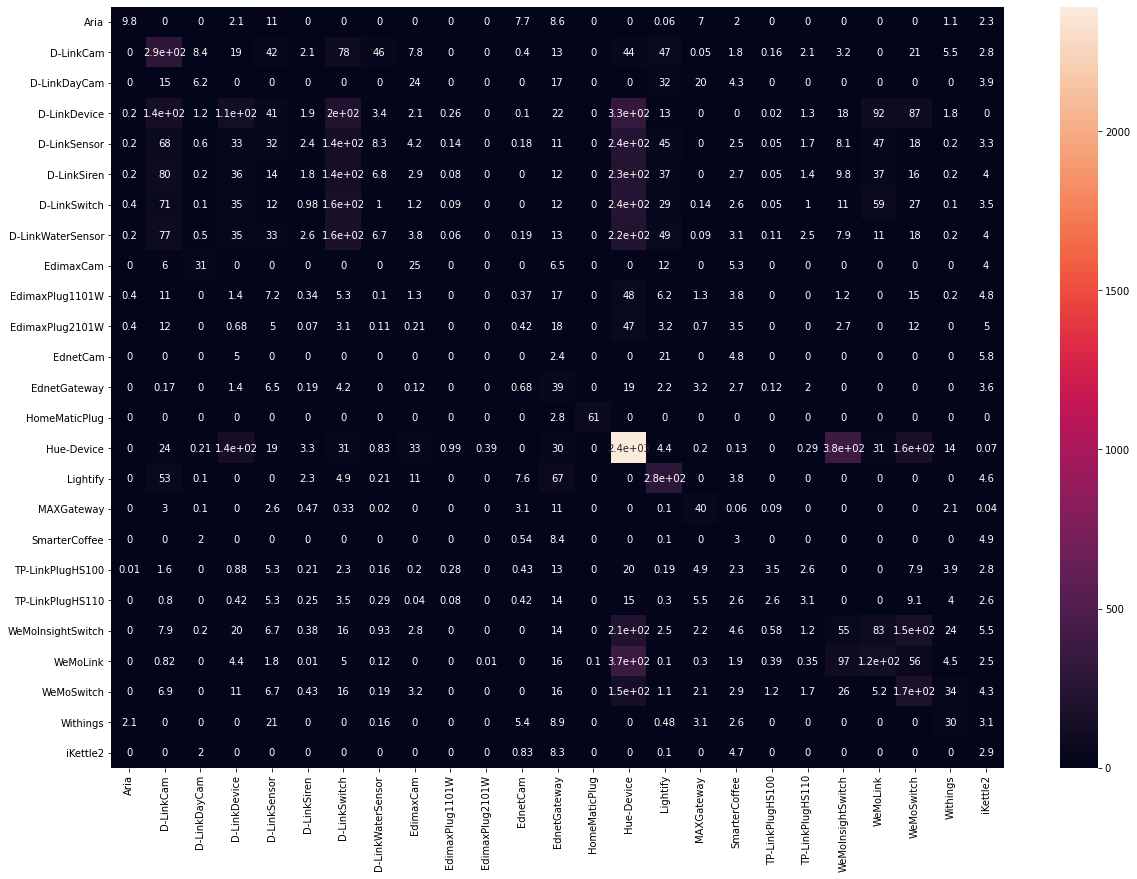





IoTSentinel     0   1   DT_r    0.73  0.62  0.67  0.62  0.63  0.68  0.18     0.0     0.18    
IoTSentinel     0   2   DT_r    0.73  0.6   0.66  0.6   0.62  0.69  0.14     0.0     0.14    
IoTSentinel     0   3   DT_r    0.72  0.59  0.65  0.59  0.61  0.67  0.16     0.0     0.16    
IoTSentinel     0   4   DT_r    0.72  0.6   0.68  0.6   0.63  0.68  0.16     0.0     0.16    
IoTSentinel     0   5   DT_r    0.73  0.6   0.68  0.6   0.62  0.68  0.18     0.0     0.18    
IoTSentinel     0   6   DT_r    0.72  0.59  0.67  0.59  0.62  0.67  0.13     0.0     0.14    
IoTSentinel     0   7   DT_r    0.72  0.61  0.67  0.61  0.63  0.68  0.15     0.0     0.15    
IoTSentinel     0   8   DT_r    0.72  0.58  0.68  0.58  0.61  0.68  0.14     0.0     0.14    
IoTSentinel     0   9   DT_r    0.72  0.61  0.68  0.61  0.63  0.68  0.14     0.0     0.14    
IoTSentinel     0   10  DT_r    0.73  0.59  0.66  0.59  0.62  0.68  0.13     0.0     0.13    
IoTSentinel     1   1   DT_r    0.72  0.6   0.66  0.6   

IoTSentinel     8   9   DT_r    0.73  0.6   0.68  0.6   0.62  0.68  0.2      0.0     0.2     
IoTSentinel     8   10  DT_r    0.72  0.59  0.67  0.59  0.62  0.68  0.16     0.0     0.16    
IoTSentinel     9   1   DT_r    0.72  0.61  0.67  0.61  0.63  0.68  0.17     0.0     0.17    
IoTSentinel     9   2   DT_r    0.72  0.59  0.68  0.59  0.62  0.68  0.17     0.0     0.18    
IoTSentinel     9   3   DT_r    0.71  0.59  0.66  0.59  0.61  0.67  0.21     0.0     0.21    
IoTSentinel     9   4   DT_r    0.72  0.6   0.66  0.6   0.62  0.67  0.21     0.0     0.21    
IoTSentinel     9   5   DT_r    0.73  0.61  0.69  0.61  0.63  0.69  0.2      0.0     0.2     
IoTSentinel     9   6   DT_r    0.72  0.59  0.67  0.59  0.62  0.67  0.18     0.0     0.18    
IoTSentinel     9   7   DT_r    0.72  0.61  0.68  0.61  0.63  0.68  0.15     0.0     0.16    
IoTSentinel     9   8   DT_r    0.72  0.58  0.65  0.58  0.61  0.67  0.19     0.0     0.19    
IoTSentinel     9   9   DT_r    0.73  0.6   0.67  0.6   0.63

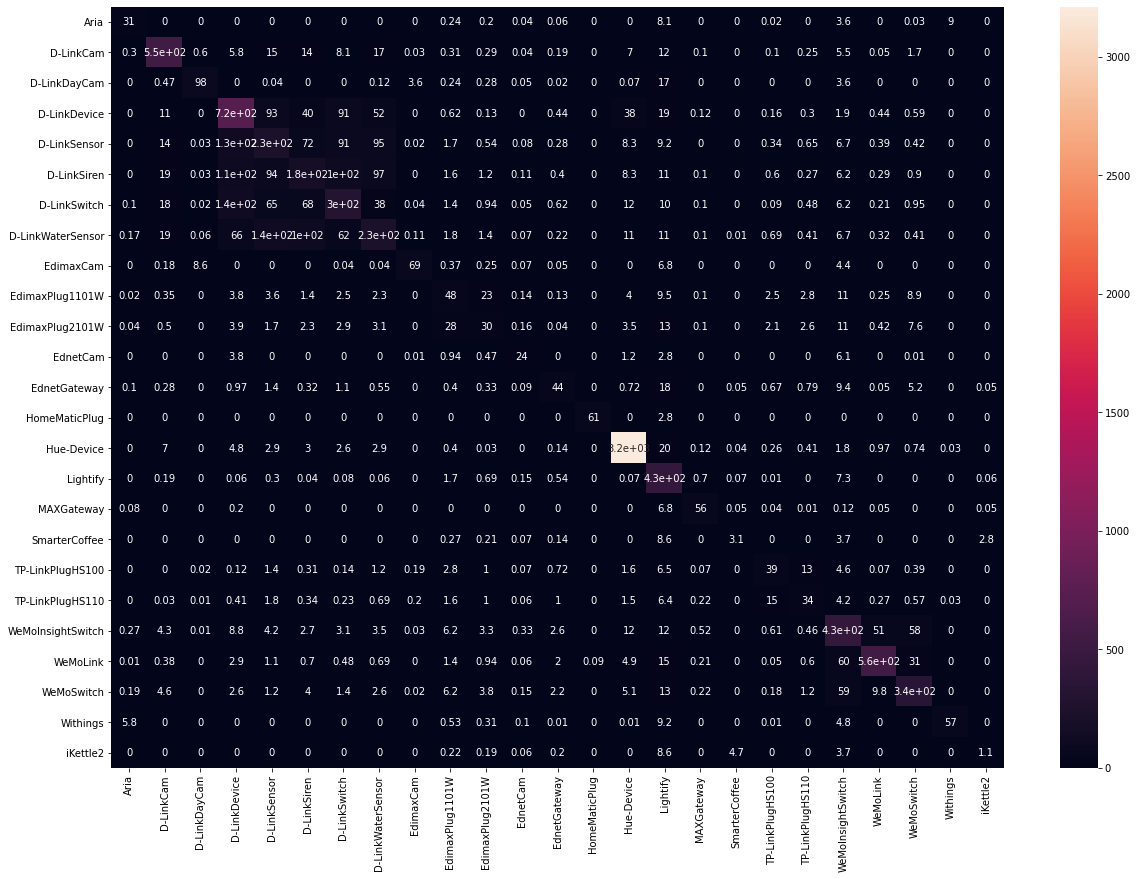





IoTSentinel     0   1   Random  0.72  0.61  0.66  0.61  0.63  0.68  3.13     0.14    3.28    
IoTSentinel     0   2   Random  0.72  0.6   0.66  0.6   0.62  0.68  3.0      0.14    3.15    
IoTSentinel     0   3   Random  0.73  0.59  0.67  0.59  0.61  0.69  2.91     0.15    3.05    
IoTSentinel     0   4   Random  0.73  0.59  0.65  0.59  0.61  0.68  3.27     0.14    3.41    
IoTSentinel     0   5   Random  0.73  0.61  0.69  0.61  0.64  0.69  2.98     0.14    3.12    
IoTSentinel     0   6   Random  0.73  0.61  0.68  0.61  0.64  0.69  2.92     0.13    3.05    
IoTSentinel     0   7   Random  0.73  0.61  0.67  0.61  0.63  0.69  3.24     0.14    3.39    
IoTSentinel     0   8   Random  0.73  0.61  0.67  0.61  0.63  0.69  3.38     0.18    3.57    
IoTSentinel     0   9   Random  0.73  0.6   0.67  0.6   0.63  0.69  3.0      0.14    3.15    
IoTSentinel     0   10  Random  0.73  0.61  0.69  0.61  0.64  0.69  3.18     0.18    3.36    
IoTSentinel     1   1   Random  0.72  0.6   0.66  0.6   

IoTSentinel     8   9   Random  0.73  0.6   0.68  0.6   0.63  0.69  2.98     0.14    3.11    
IoTSentinel     8   10  Random  0.73  0.61  0.67  0.61  0.63  0.69  2.98     0.14    3.12    
IoTSentinel     9   1   Random  0.73  0.62  0.68  0.62  0.64  0.69  2.98     0.14    3.12    
IoTSentinel     9   2   Random  0.73  0.62  0.69  0.62  0.64  0.69  2.97     0.14    3.11    
IoTSentinel     9   3   Random  0.73  0.59  0.66  0.59  0.62  0.69  3.0      0.14    3.14    
IoTSentinel     9   4   Random  0.73  0.59  0.67  0.59  0.62  0.69  2.98     0.14    3.11    
IoTSentinel     9   5   Random  0.73  0.6   0.67  0.6   0.62  0.69  3.01     0.13    3.15    
IoTSentinel     9   6   Random  0.72  0.61  0.68  0.61  0.63  0.68  2.97     0.14    3.11    
IoTSentinel     9   7   Random  0.73  0.6   0.66  0.6   0.62  0.69  2.96     0.14    3.1     
IoTSentinel     9   8   Random  0.73  0.6   0.68  0.6   0.62  0.69  2.95     0.14    3.09    
IoTSentinel     9   9   Random  0.73  0.61  0.67  0.61  0.64

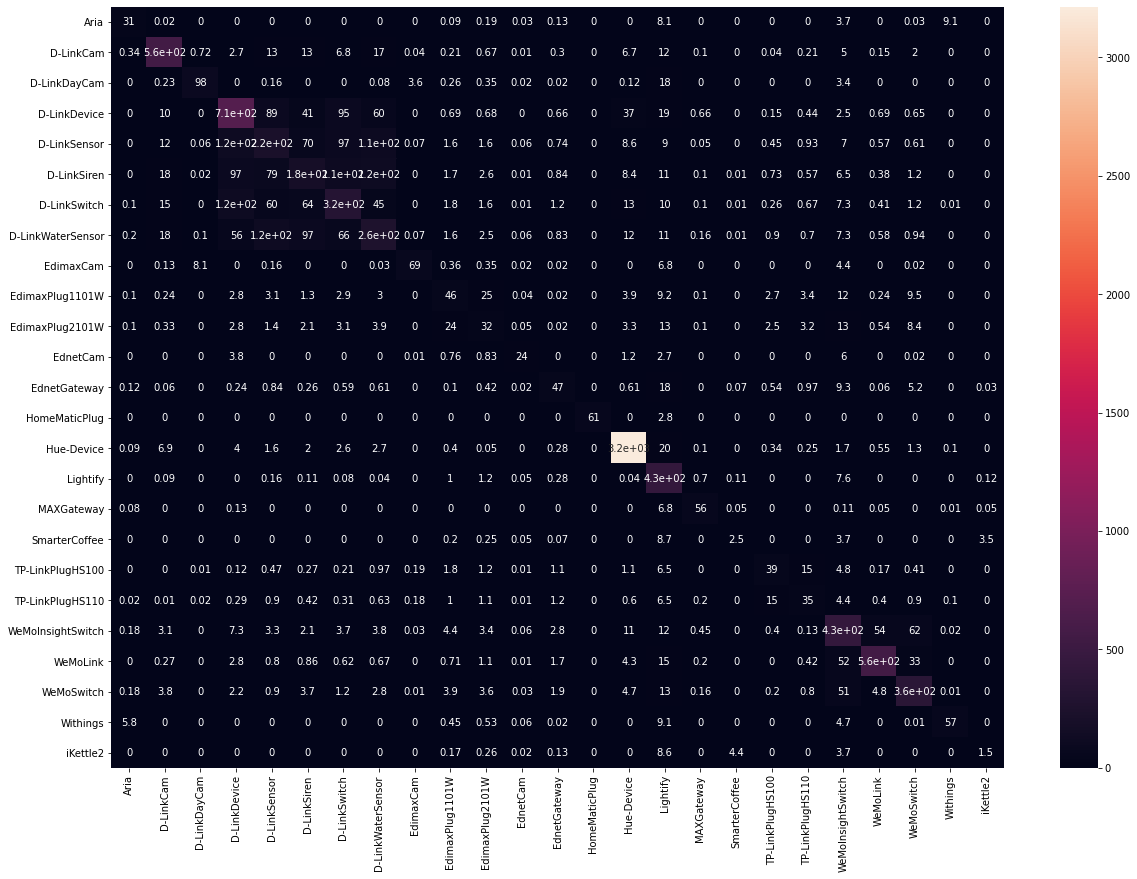





IoTSentinel     0   1   KNN_R   0.71  0.59  0.65  0.59  0.61  0.66  0.71     0.48    1.19    
IoTSentinel     0   2   KNN_R   0.71  0.6   0.63  0.6   0.6   0.66  0.72     0.47    1.2     
IoTSentinel     0   3   KNN_R   0.7   0.56  0.65  0.56  0.58  0.66  0.71     0.46    1.17    
IoTSentinel     0   4   KNN_R   0.7   0.57  0.66  0.57  0.59  0.65  0.7      0.45    1.15    
IoTSentinel     0   5   KNN_R   0.71  0.6   0.67  0.6   0.62  0.67  0.67     0.45    1.12    
IoTSentinel     0   6   KNN_R   0.7   0.58  0.63  0.58  0.59  0.66  0.67     0.45    1.12    
IoTSentinel     0   7   KNN_R   0.69  0.57  0.63  0.57  0.59  0.65  0.65     0.46    1.11    
IoTSentinel     0   8   KNN_R   0.7   0.6   0.63  0.6   0.6   0.65  0.64     0.52    1.17    
IoTSentinel     0   9   KNN_R   0.7   0.59  0.63  0.59  0.59  0.66  0.65     0.45    1.11    
IoTSentinel     0   10  KNN_R   0.7   0.57  0.66  0.57  0.6   0.66  0.76     0.47    1.22    
IoTSentinel     1   1   KNN_R   0.7   0.59  0.66  0.59  

IoTSentinel     8   9   KNN_R   0.69  0.58  0.64  0.58  0.59  0.65  0.71     0.45    1.17    
IoTSentinel     8   10  KNN_R   0.7   0.58  0.66  0.58  0.6   0.66  0.71     0.44    1.15    
IoTSentinel     9   1   KNN_R   0.7   0.57  0.62  0.57  0.58  0.65  0.74     0.46    1.19    
IoTSentinel     9   2   KNN_R   0.7   0.6   0.63  0.6   0.6   0.65  0.72     0.47    1.19    
IoTSentinel     9   3   KNN_R   0.7   0.58  0.65  0.58  0.61  0.65  0.85     0.47    1.32    
IoTSentinel     9   4   KNN_R   0.7   0.58  0.66  0.58  0.6   0.65  0.72     0.46    1.18    
IoTSentinel     9   5   KNN_R   0.71  0.57  0.61  0.57  0.58  0.66  0.77     0.47    1.24    
IoTSentinel     9   6   KNN_R   0.7   0.58  0.65  0.58  0.6   0.65  0.73     0.45    1.18    
IoTSentinel     9   7   KNN_R   0.71  0.59  0.65  0.59  0.61  0.67  0.64     0.44    1.08    
IoTSentinel     9   8   KNN_R   0.7   0.59  0.64  0.59  0.6   0.66  0.71     0.47    1.18    
IoTSentinel     9   9   KNN_R   0.7   0.58  0.65  0.58  0.6 

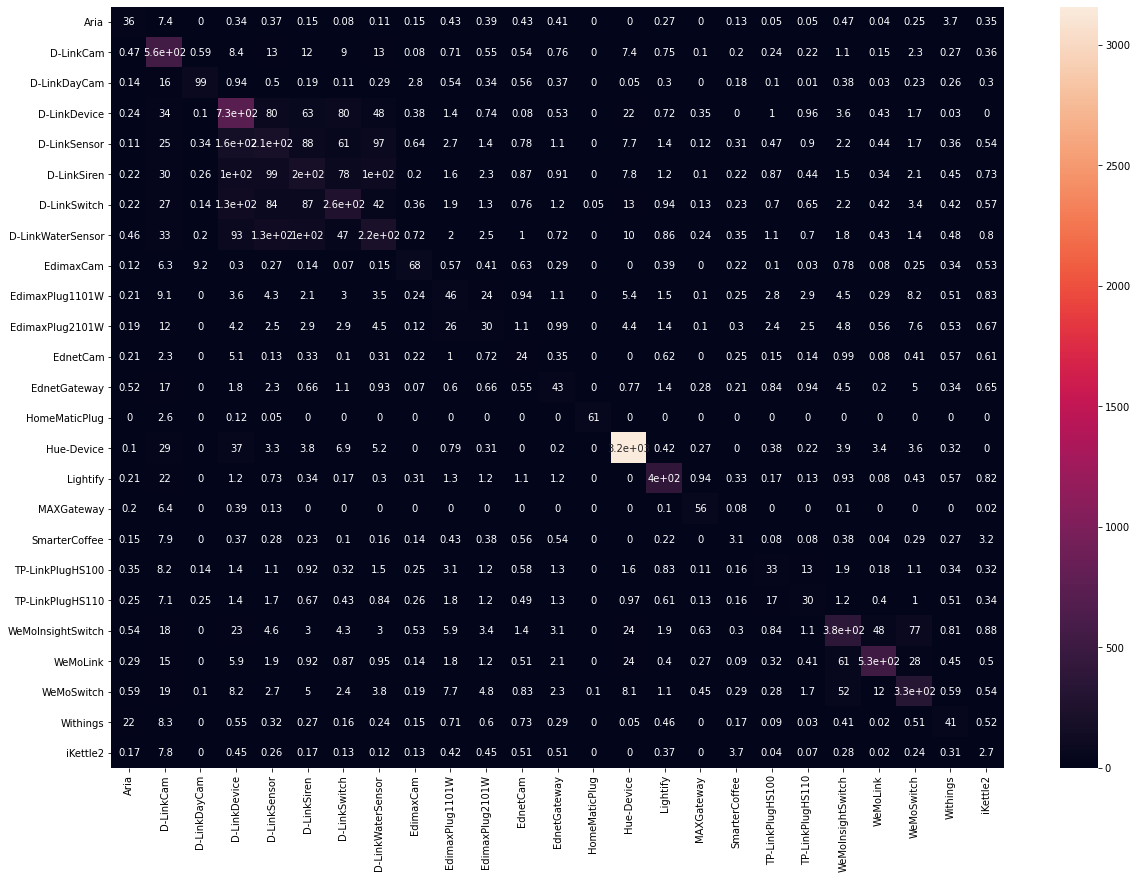





IoTSentinel     0   1   GB      0.42  0.12  0.09  0.12  0.09  0.26  17.24    0.03    17.27   
IoTSentinel     0   2   GB      0.4   0.11  0.09  0.11  0.09  0.21  16.11    0.03    16.15   
IoTSentinel     0   3   GB      0.42  0.13  0.09  0.13  0.1   0.26  16.13    0.03    16.17   
IoTSentinel     0   4   GB      0.43  0.14  0.1   0.14  0.11  0.29  15.99    0.03    16.02   
IoTSentinel     0   5   GB      0.44  0.13  0.11  0.13  0.12  0.28  15.95    0.03    15.98   
IoTSentinel     0   6   GB      0.46  0.15  0.12  0.15  0.13  0.33  16.08    0.03    16.11   
IoTSentinel     0   7   GB      0.43  0.13  0.09  0.13  0.1   0.29  16.02    0.03    16.05   
IoTSentinel     0   8   GB      0.4   0.1   0.06  0.1   0.07  0.23  16.19    0.03    16.22   
IoTSentinel     0   9   GB      0.42  0.12  0.08  0.12  0.09  0.25  15.96    0.03    15.99   
IoTSentinel     0   10  GB      0.39  0.11  0.08  0.11  0.09  0.22  16.05    0.03    16.08   
IoTSentinel     1   1   GB      0.4   0.12  0.12  0.12  

IoTSentinel     8   9   GB      0.4   0.11  0.09  0.11  0.09  0.22  21.38    0.04    21.43   
IoTSentinel     8   10  GB      0.42  0.12  0.1   0.12  0.1   0.27  19.22    0.03    19.25   
IoTSentinel     9   1   GB      0.44  0.14  0.11  0.14  0.12  0.29  16.93    0.03    16.96   
IoTSentinel     9   2   GB      0.42  0.12  0.13  0.12  0.1   0.28  20.68    0.04    20.72   
IoTSentinel     9   3   GB      0.42  0.12  0.09  0.12  0.1   0.26  21.39    0.05    21.43   
IoTSentinel     9   4   GB      0.46  0.15  0.12  0.15  0.13  0.33  20.8     0.05    20.84   
IoTSentinel     9   5   GB      0.39  0.1   0.07  0.1   0.07  0.2   17.07    0.03    17.1    
IoTSentinel     9   6   GB      0.4   0.11  0.08  0.11  0.08  0.22  18.96    0.04    19.0    
IoTSentinel     9   7   GB      0.47  0.15  0.11  0.15  0.12  0.34  21.42    0.04    21.46   
IoTSentinel     9   8   GB      0.46  0.15  0.14  0.15  0.13  0.31  21.33    0.05    21.37   
IoTSentinel     9   9   GB      0.45  0.14  0.11  0.14  0.12

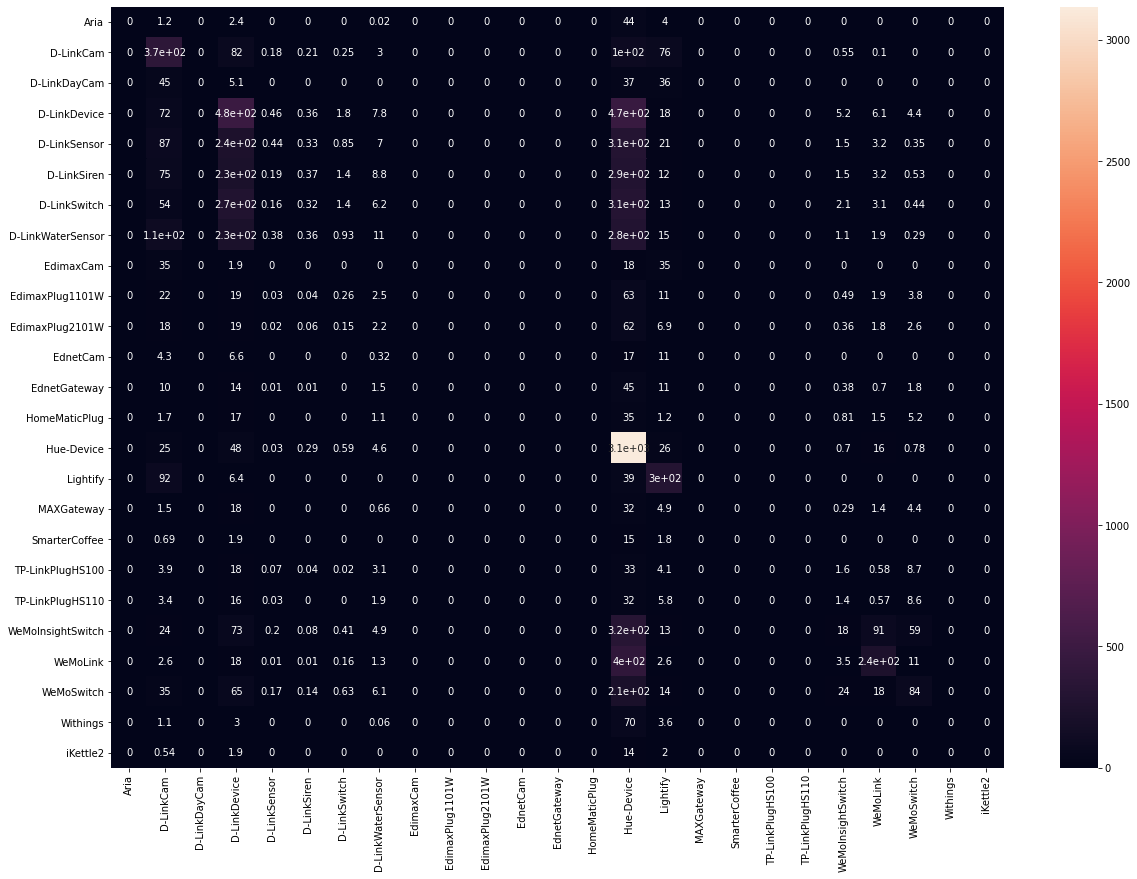





IoTSense        0   1   Naive   0.06  0.11  0.07  0.11  0.03  0.03  0.05     0.0     0.06    
IoTSense        0   2   Naive   0.06  0.11  0.05  0.11  0.03  0.03  0.05     0.01    0.06    
IoTSense        0   3   Naive   0.06  0.11  0.08  0.11  0.04  0.04  0.05     0.0     0.05    
IoTSense        0   4   Naive   0.06  0.12  0.1   0.12  0.04  0.03  0.05     0.0     0.05    
IoTSense        0   5   Naive   0.05  0.11  0.05  0.11  0.03  0.03  0.05     0.0     0.05    
IoTSense        0   6   Naive   0.06  0.11  0.06  0.11  0.03  0.03  0.05     0.0     0.05    
IoTSense        0   7   Naive   0.06  0.11  0.05  0.11  0.03  0.03  0.05     0.0     0.05    
IoTSense        0   8   Naive   0.06  0.11  0.04  0.11  0.03  0.03  0.05     0.0     0.05    
IoTSense        0   9   Naive   0.06  0.12  0.06  0.12  0.04  0.04  0.05     0.0     0.05    
IoTSense        0   10  Naive   0.06  0.11  0.05  0.11  0.04  0.03  0.05     0.0     0.05    
IoTSense        1   1   Naive   0.06  0.1   0.05  0.1   

IoTSense        8   9   Naive   0.06  0.1   0.05  0.1   0.04  0.03  0.05     0.01    0.06    
IoTSense        8   10  Naive   0.06  0.11  0.05  0.11  0.03  0.03  0.05     0.0     0.05    
IoTSense        9   1   Naive   0.06  0.11  0.04  0.11  0.03  0.03  0.06     0.0     0.06    
IoTSense        9   2   Naive   0.06  0.11  0.11  0.11  0.04  0.03  0.05     0.0     0.05    
IoTSense        9   3   Naive   0.06  0.12  0.11  0.12  0.05  0.04  0.05     0.0     0.05    
IoTSense        9   4   Naive   0.06  0.12  0.05  0.12  0.04  0.04  0.05     0.0     0.05    
IoTSense        9   5   Naive   0.06  0.11  0.05  0.11  0.03  0.03  0.05     0.0     0.05    
IoTSense        9   6   Naive   0.06  0.11  0.06  0.11  0.04  0.03  0.05     0.0     0.05    
IoTSense        9   7   Naive   0.06  0.11  0.08  0.11  0.03  0.03  0.05     0.02    0.07    
IoTSense        9   8   Naive   0.05  0.11  0.05  0.11  0.03  0.03  0.05     0.0     0.05    
IoTSense        9   9   Naive   0.05  0.11  0.04  0.11  0.03

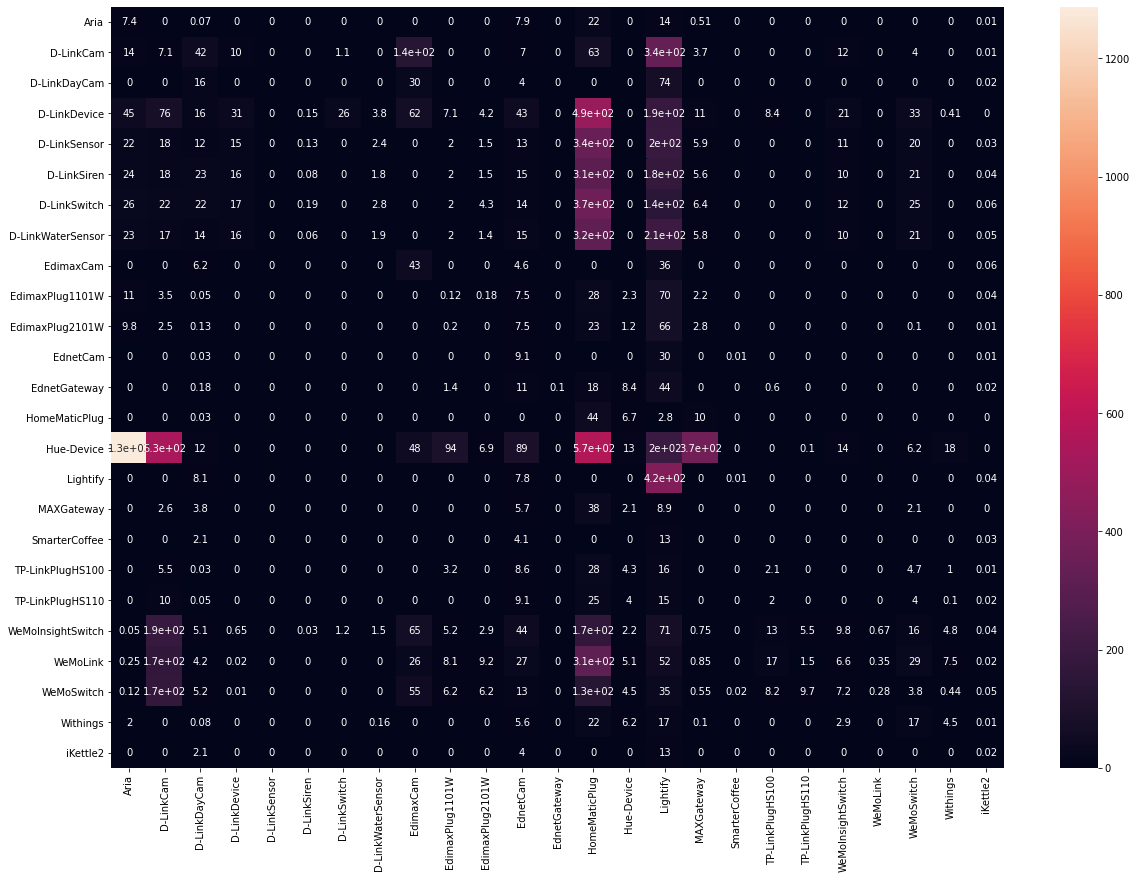





IoTSense        0   1   DT_r    0.69  0.53  0.6   0.53  0.55  0.64  0.18     0.0     0.19    
IoTSense        0   2   DT_r    0.69  0.53  0.61  0.53  0.55  0.64  0.18     0.0     0.18    
IoTSense        0   3   DT_r    0.69  0.53  0.61  0.53  0.55  0.64  0.18     0.0     0.18    
IoTSense        0   4   DT_r    0.68  0.54  0.6   0.54  0.55  0.63  0.18     0.0     0.18    
IoTSense        0   5   DT_r    0.68  0.54  0.61  0.54  0.56  0.63  0.18     0.0     0.18    
IoTSense        0   6   DT_r    0.68  0.52  0.6   0.52  0.54  0.63  0.18     0.0     0.18    
IoTSense        0   7   DT_r    0.7   0.53  0.6   0.53  0.55  0.65  0.18     0.0     0.18    
IoTSense        0   8   DT_r    0.69  0.52  0.6   0.52  0.54  0.64  0.18     0.0     0.18    
IoTSense        0   9   DT_r    0.68  0.51  0.63  0.51  0.54  0.63  0.18     0.0     0.18    
IoTSense        0   10  DT_r    0.69  0.52  0.59  0.52  0.54  0.64  0.18     0.0     0.18    
IoTSense        1   1   DT_r    0.69  0.53  0.64  0.53  

IoTSense        8   9   DT_r    0.69  0.52  0.61  0.52  0.54  0.64  0.18     0.0     0.19    
IoTSense        8   10  DT_r    0.69  0.52  0.61  0.52  0.55  0.64  0.19     0.0     0.19    
IoTSense        9   1   DT_r    0.69  0.53  0.62  0.53  0.56  0.64  0.19     0.0     0.19    
IoTSense        9   2   DT_r    0.69  0.52  0.62  0.52  0.55  0.64  0.19     0.0     0.19    
IoTSense        9   3   DT_r    0.69  0.52  0.62  0.52  0.54  0.64  0.19     0.0     0.19    
IoTSense        9   4   DT_r    0.69  0.53  0.61  0.53  0.55  0.64  0.18     0.0     0.19    
IoTSense        9   5   DT_r    0.68  0.52  0.59  0.52  0.54  0.63  0.18     0.0     0.19    
IoTSense        9   6   DT_r    0.69  0.53  0.61  0.53  0.55  0.64  0.19     0.0     0.19    
IoTSense        9   7   DT_r    0.69  0.54  0.63  0.54  0.56  0.65  0.19     0.0     0.19    
IoTSense        9   8   DT_r    0.69  0.53  0.62  0.53  0.55  0.64  0.19     0.0     0.19    
IoTSense        9   9   DT_r    0.68  0.52  0.6   0.52  0.54

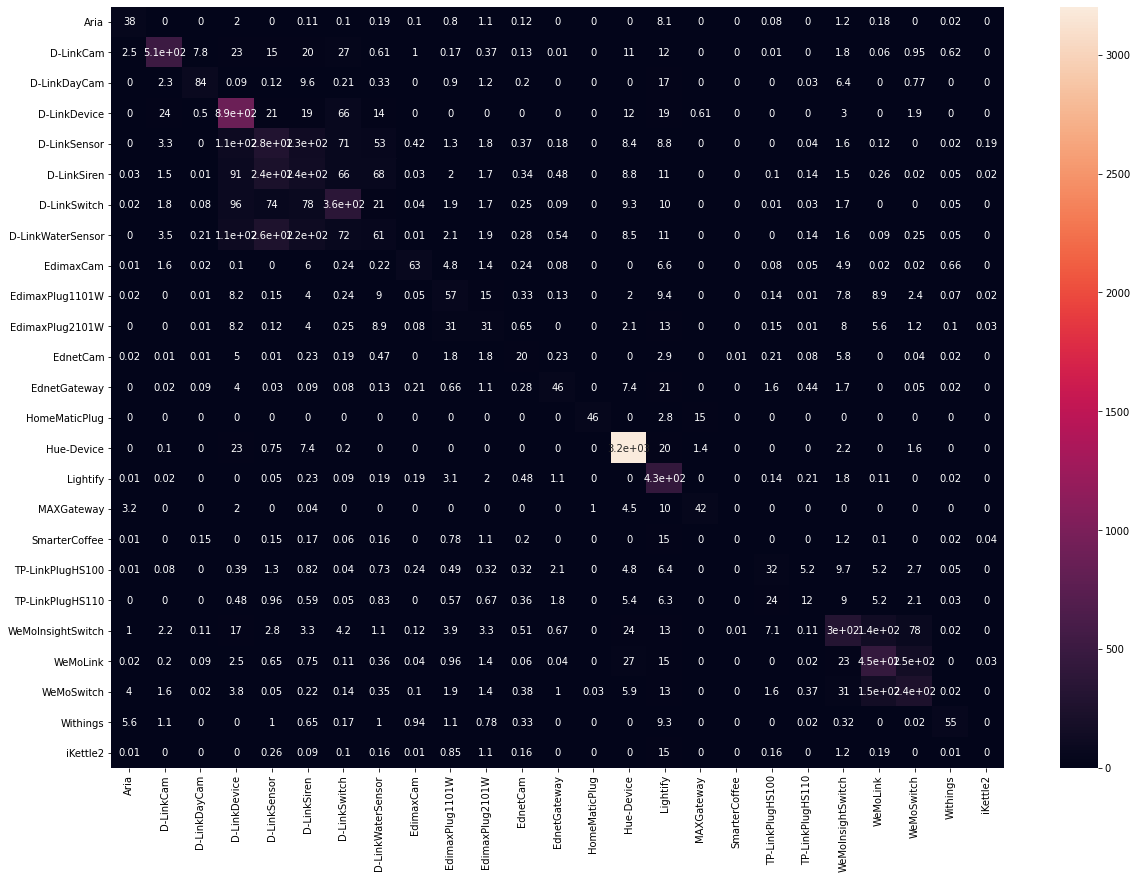





IoTSense        0   1   Random  0.69  0.53  0.62  0.53  0.56  0.64  4.97     0.18    5.15    
IoTSense        0   2   Random  0.69  0.53  0.6   0.53  0.55  0.64  4.44     0.12    4.55    
IoTSense        0   3   Random  0.69  0.53  0.61  0.53  0.55  0.64  3.8      0.12    3.92    
IoTSense        0   4   Random  0.69  0.53  0.6   0.53  0.55  0.64  3.83     0.12    3.96    
IoTSense        0   5   Random  0.69  0.52  0.6   0.52  0.54  0.64  3.8      0.12    3.93    
IoTSense        0   6   Random  0.69  0.54  0.62  0.54  0.56  0.64  3.82     0.12    3.94    
IoTSense        0   7   Random  0.69  0.54  0.61  0.54  0.56  0.64  3.81     0.12    3.94    
IoTSense        0   8   Random  0.69  0.52  0.61  0.52  0.55  0.64  4.4      0.17    4.57    
IoTSense        0   9   Random  0.69  0.54  0.62  0.54  0.56  0.64  4.85     0.17    5.03    
IoTSense        0   10  Random  0.68  0.52  0.61  0.52  0.54  0.63  4.99     0.17    5.16    
IoTSense        1   1   Random  0.69  0.52  0.6   0.52  

IoTSense        8   9   Random  0.69  0.53  0.61  0.53  0.55  0.64  5.34     0.18    5.52    
IoTSense        8   10  Random  0.69  0.53  0.61  0.53  0.55  0.64  5.1      0.12    5.22    
IoTSense        9   1   Random  0.68  0.52  0.6   0.52  0.54  0.63  5.41     0.13    5.54    
IoTSense        9   2   Random  0.69  0.53  0.61  0.53  0.55  0.64  3.69     0.12    3.81    
IoTSense        9   3   Random  0.68  0.52  0.61  0.52  0.55  0.63  3.93     0.12    4.06    
IoTSense        9   4   Random  0.7   0.54  0.61  0.54  0.56  0.65  3.79     0.12    3.9     
IoTSense        9   5   Random  0.69  0.52  0.6   0.52  0.54  0.64  3.98     0.12    4.11    
IoTSense        9   6   Random  0.7   0.54  0.62  0.54  0.56  0.65  3.95     0.12    4.07    
IoTSense        9   7   Random  0.69  0.52  0.6   0.52  0.54  0.64  3.94     0.17    4.11    
IoTSense        9   8   Random  0.68  0.53  0.62  0.53  0.56  0.63  5.0      0.17    5.17    
IoTSense        9   9   Random  0.69  0.52  0.6   0.52  0.54

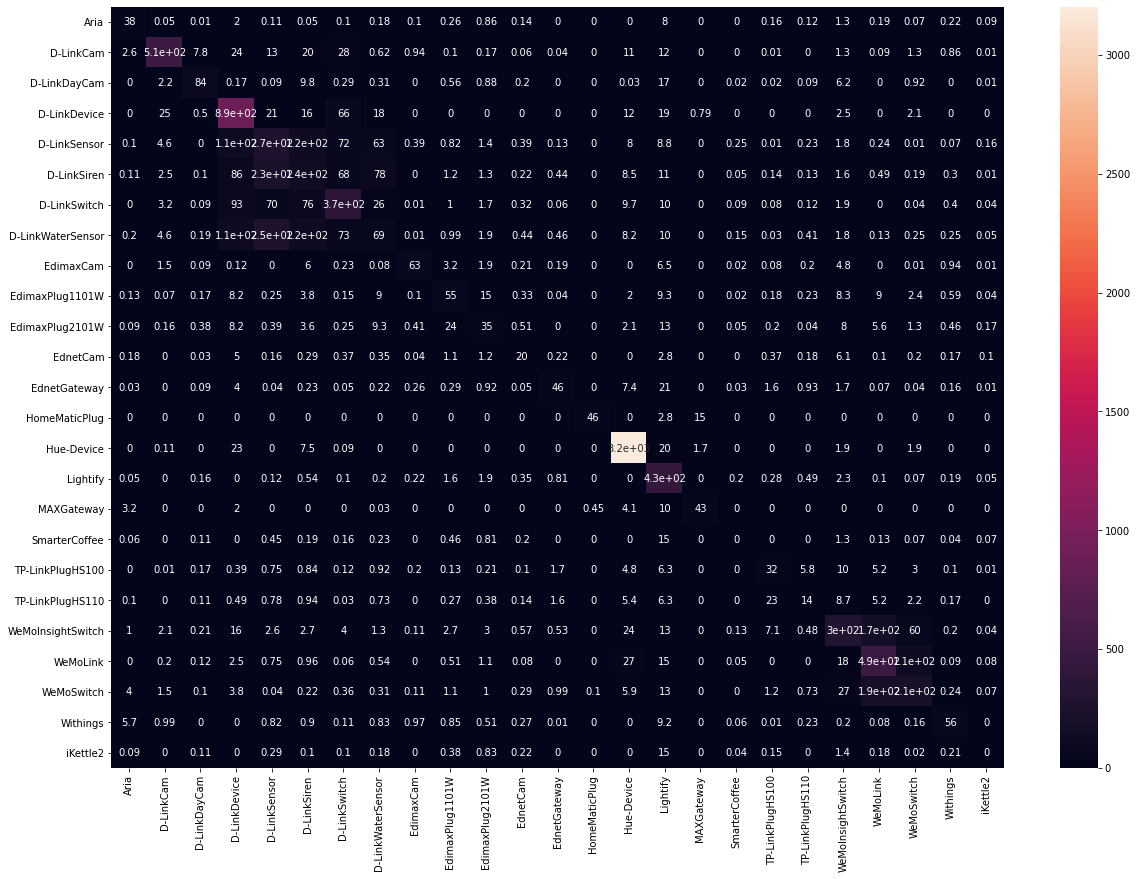





IoTSense        0   1   KNN_R   0.67  0.53  0.56  0.53  0.52  0.62  2.57     1.52    4.08    
IoTSense        0   2   KNN_R   0.67  0.52  0.57  0.52  0.53  0.62  2.55     1.53    4.09    
IoTSense        0   3   KNN_R   0.66  0.52  0.55  0.52  0.51  0.61  2.5      1.55    4.05    
IoTSense        0   4   KNN_R   0.67  0.53  0.57  0.53  0.53  0.62  2.56     1.57    4.13    
IoTSense        0   5   KNN_R   0.66  0.51  0.56  0.51  0.51  0.61  2.54     1.6     4.14    
IoTSense        0   6   KNN_R   0.65  0.52  0.55  0.52  0.51  0.6   2.58     1.65    4.22    
IoTSense        0   7   KNN_R   0.66  0.52  0.55  0.52  0.51  0.61  2.59     1.69    4.29    
IoTSense        0   8   KNN_R   0.66  0.54  0.56  0.54  0.53  0.61  2.62     1.7     4.31    
IoTSense        0   9   KNN_R   0.66  0.53  0.56  0.53  0.52  0.61  2.58     1.62    4.2     
IoTSense        0   10  KNN_R   0.67  0.53  0.56  0.53  0.53  0.62  2.84     1.66    4.5     
IoTSense        1   1   KNN_R   0.66  0.51  0.57  0.51  

IoTSense        8   9   KNN_R   0.66  0.51  0.58  0.51  0.52  0.61  1.89     0.96    2.86    
IoTSense        8   10  KNN_R   0.66  0.5   0.56  0.5   0.51  0.61  1.88     0.97    2.85    
IoTSense        9   1   KNN_R   0.65  0.51  0.58  0.51  0.52  0.6   1.91     1.41    3.33    
IoTSense        9   2   KNN_R   0.67  0.51  0.55  0.51  0.51  0.62  2.45     1.45    3.9     
IoTSense        9   3   KNN_R   0.66  0.54  0.58  0.54  0.53  0.61  2.44     1.46    3.9     
IoTSense        9   4   KNN_R   0.67  0.53  0.55  0.53  0.52  0.62  2.47     1.44    3.9     
IoTSense        9   5   KNN_R   0.66  0.53  0.56  0.53  0.52  0.61  2.45     1.47    3.92    
IoTSense        9   6   KNN_R   0.66  0.51  0.59  0.51  0.52  0.61  2.46     1.49    3.95    
IoTSense        9   7   KNN_R   0.67  0.53  0.54  0.53  0.52  0.62  2.44     1.48    3.91    
IoTSense        9   8   KNN_R   0.65  0.51  0.56  0.51  0.51  0.6   2.56     1.53    4.09    
IoTSense        9   9   KNN_R   0.66  0.52  0.58  0.52  0.52

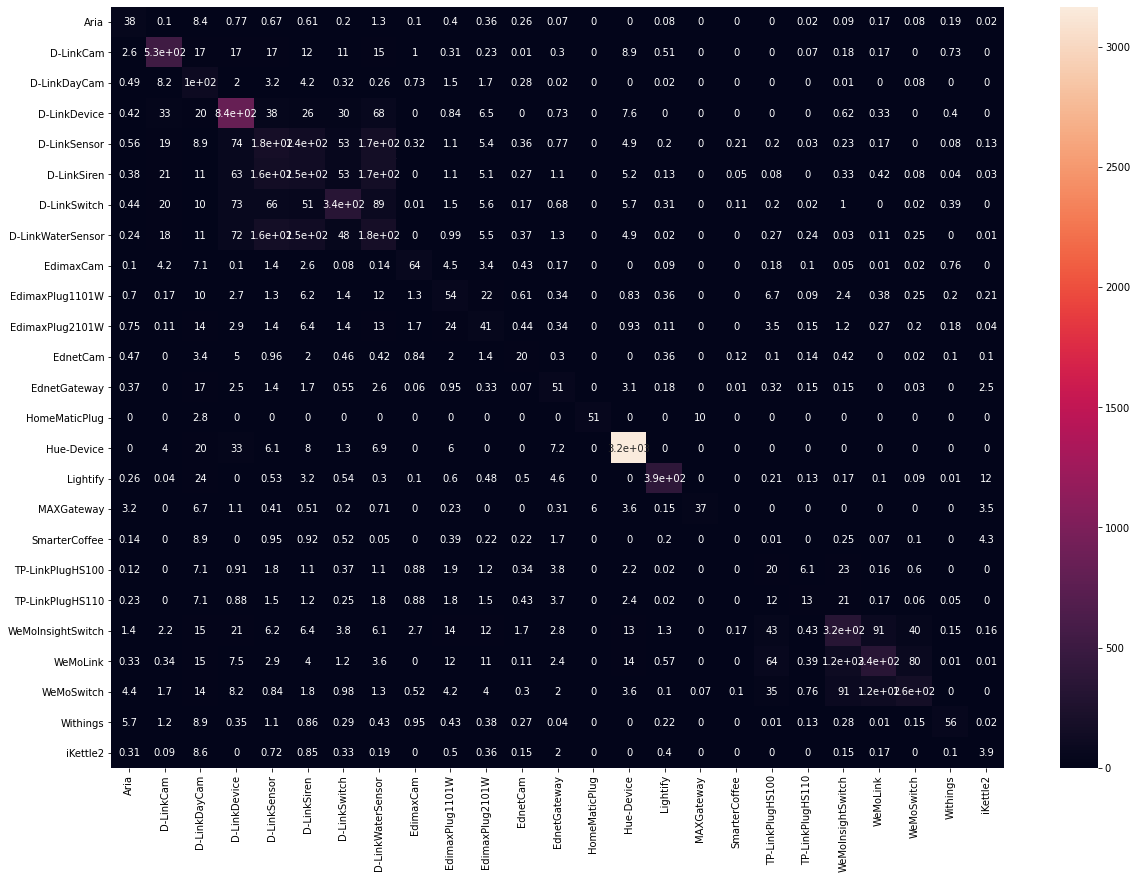





IoTSense        0   1   GB      0.38  0.1   0.05  0.1   0.07  0.2   20.69    0.05    20.74   
IoTSense        0   2   GB      0.4   0.1   0.05  0.1   0.07  0.24  16.91    0.03    16.94   
IoTSense        0   3   GB      0.34  0.06  0.06  0.06  0.04  0.09  19.33    0.05    19.38   
IoTSense        0   4   GB      0.4   0.11  0.07  0.11  0.08  0.22  21.4     0.05    21.45   
IoTSense        0   5   GB      0.38  0.11  0.05  0.11  0.07  0.19  21.45    0.05    21.5    
IoTSense        0   6   GB      0.39  0.11  0.09  0.11  0.08  0.22  18.23    0.03    18.26   
IoTSense        0   7   GB      0.37  0.09  0.07  0.09  0.07  0.19  17.29    0.04    17.34   
IoTSense        0   8   GB      0.3   0.04  0.01  0.04  0.02  0.0   21.44    0.05    21.48   
IoTSense        0   9   GB      0.37  0.1   0.08  0.1   0.08  0.19  21.4     0.05    21.45   
IoTSense        0   10  GB      0.37  0.1   0.09  0.1   0.08  0.2   20.07    0.03    20.1    
IoTSense        1   1   GB      0.33  0.07  0.02  0.07  

IoTSense        8   9   GB      0.36  0.09  0.05  0.09  0.06  0.13  22.74    0.09    22.82   
IoTSense        8   10  GB      0.39  0.1   0.06  0.1   0.07  0.23  21.86    0.04    21.9    
IoTSense        9   1   GB      0.37  0.08  0.08  0.08  0.06  0.17  16.6     0.03    16.63   
IoTSense        9   2   GB      0.41  0.12  0.1   0.12  0.1   0.25  20.0     0.05    20.05   
IoTSense        9   3   GB      0.4   0.12  0.09  0.12  0.09  0.27  21.32    0.05    21.37   
IoTSense        9   4   GB      0.33  0.07  0.03  0.07  0.04  0.11  20.76    0.04    20.8    
IoTSense        9   5   GB      0.35  0.09  0.05  0.09  0.06  0.14  17.65    0.03    17.69   
IoTSense        9   6   GB      0.37  0.1   0.09  0.1   0.07  0.18  18.27    0.05    18.31   
IoTSense        9   7   GB      0.38  0.11  0.08  0.11  0.08  0.21  21.22    0.04    21.26   
IoTSense        9   8   GB      0.41  0.12  0.08  0.12  0.09  0.26  21.46    0.05    21.51   
IoTSense        9   9   GB      0.34  0.06  0.05  0.06  0.04

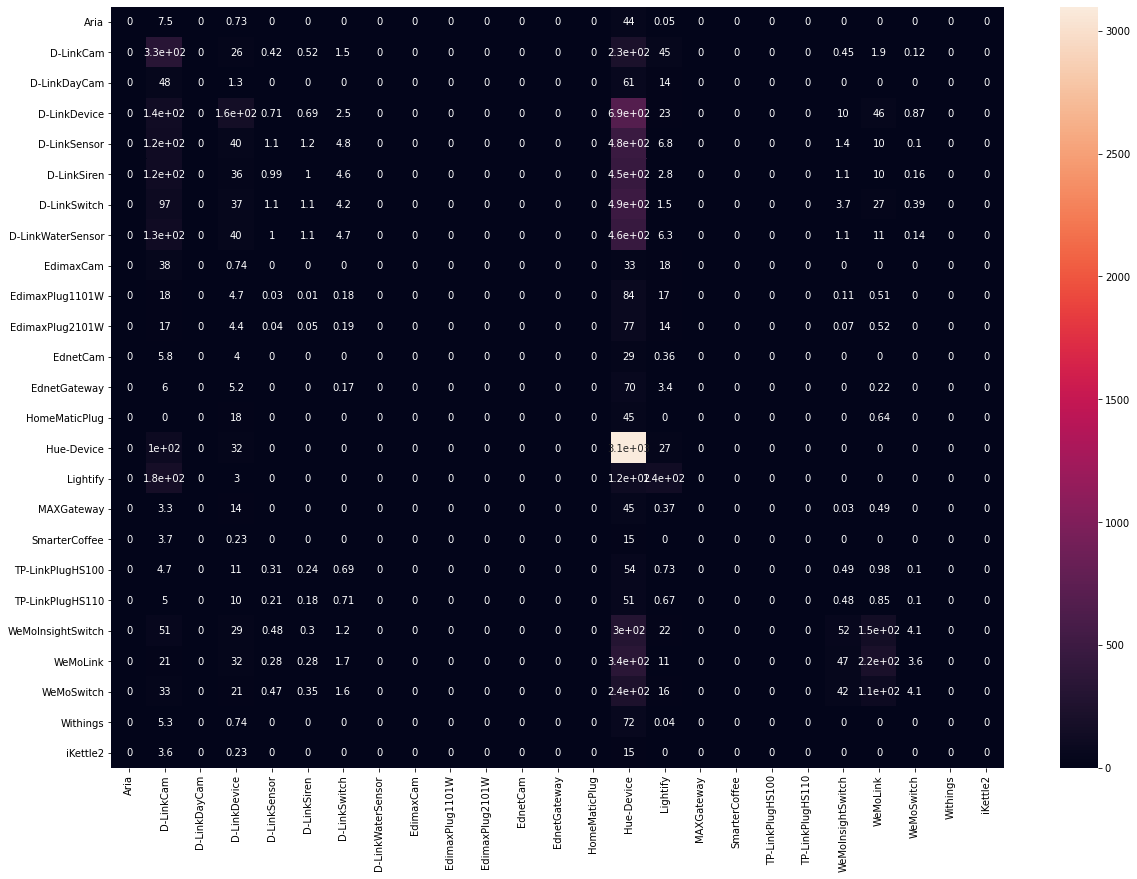





IoTDevID       0   1   Naive   0.22  0.17  0.11  0.17  0.09  0.15  0.06     0.01    0.06    
IoTDevID       0   2   Naive   0.22  0.17  0.11  0.17  0.09  0.15  0.05     0.0     0.05    
IoTDevID       0   3   Naive   0.23  0.17  0.11  0.17  0.09  0.15  0.05     0.0     0.05    
IoTDevID       0   4   Naive   0.23  0.17  0.11  0.17  0.09  0.15  0.05     0.0     0.05    
IoTDevID       0   5   Naive   0.23  0.17  0.1   0.17  0.09  0.15  0.05     0.0     0.05    
IoTDevID       0   6   Naive   0.23  0.15  0.11  0.15  0.08  0.15  0.05     0.0     0.05    
IoTDevID       0   7   Naive   0.23  0.17  0.1   0.17  0.09  0.15  0.05     0.0     0.05    
IoTDevID       0   8   Naive   0.23  0.18  0.11  0.18  0.1   0.16  0.05     0.0     0.05    
IoTDevID       0   9   Naive   0.23  0.17  0.11  0.17  0.09  0.15  0.05     0.0     0.05    
IoTDevID       0   10  Naive   0.23  0.19  0.12  0.19  0.09  0.16  0.05     0.0     0.05    
IoTDevID       1   1   Naive   0.22  0.17  0.11  0.17  0.09  0.15 

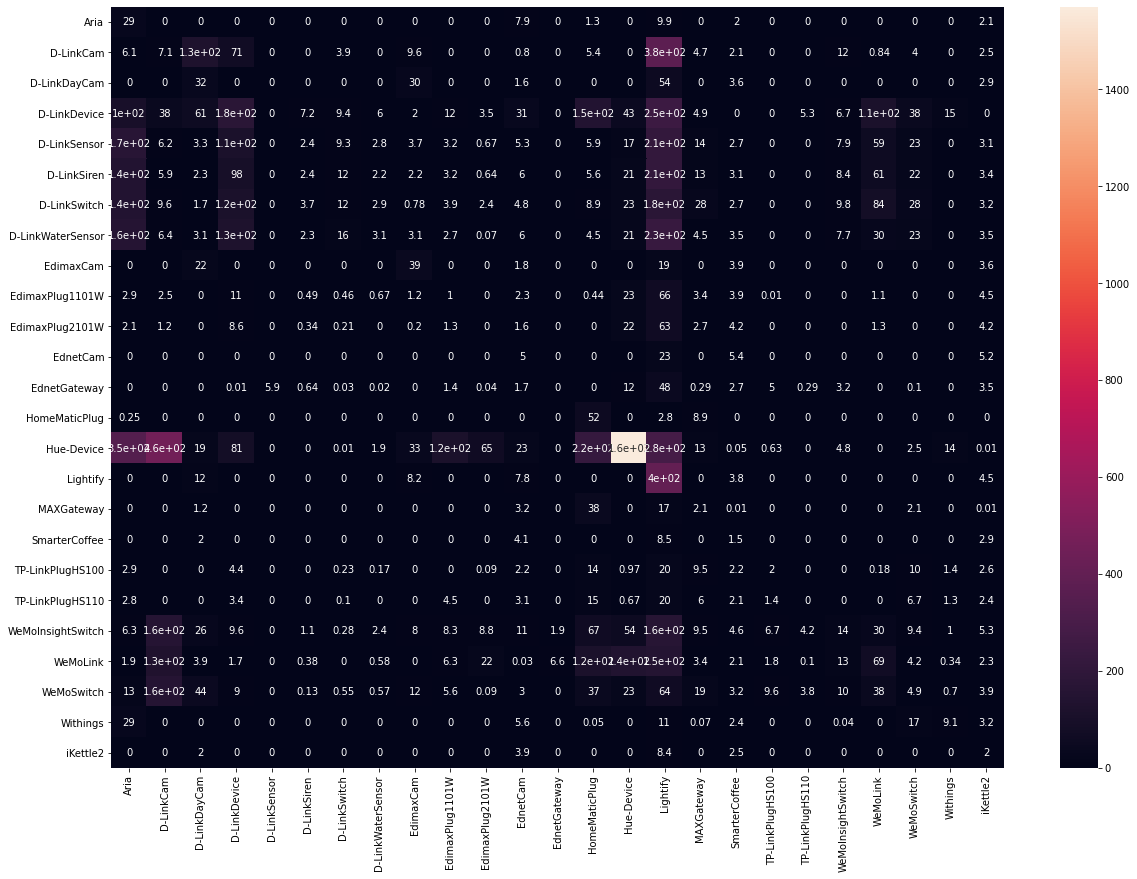





IoTDevID       0   1   DT_r    0.77  0.64  0.71  0.64  0.67  0.73  0.24     0.0     0.24    
IoTDevID       0   2   DT_r    0.77  0.65  0.72  0.65  0.67  0.74  0.25     0.0     0.25    
IoTDevID       0   3   DT_r    0.77  0.63  0.7   0.63  0.66  0.74  0.23     0.0     0.24    
IoTDevID       0   4   DT_r    0.77  0.65  0.7   0.65  0.67  0.74  0.24     0.0     0.24    
IoTDevID       0   5   DT_r    0.77  0.65  0.72  0.65  0.67  0.73  0.24     0.0     0.24    
IoTDevID       0   6   DT_r    0.77  0.65  0.69  0.65  0.66  0.73  0.25     0.0     0.25    
IoTDevID       0   7   DT_r    0.78  0.64  0.71  0.64  0.67  0.74  0.24     0.0     0.24    
IoTDevID       0   8   DT_r    0.77  0.65  0.71  0.65  0.67  0.73  0.24     0.0     0.25    
IoTDevID       0   9   DT_r    0.77  0.65  0.69  0.65  0.67  0.73  0.24     0.0     0.24    
IoTDevID       0   10  DT_r    0.77  0.65  0.69  0.65  0.67  0.73  0.25     0.0     0.25    
IoTDevID       1   1   DT_r    0.77  0.66  0.72  0.66  0.68  0.74 

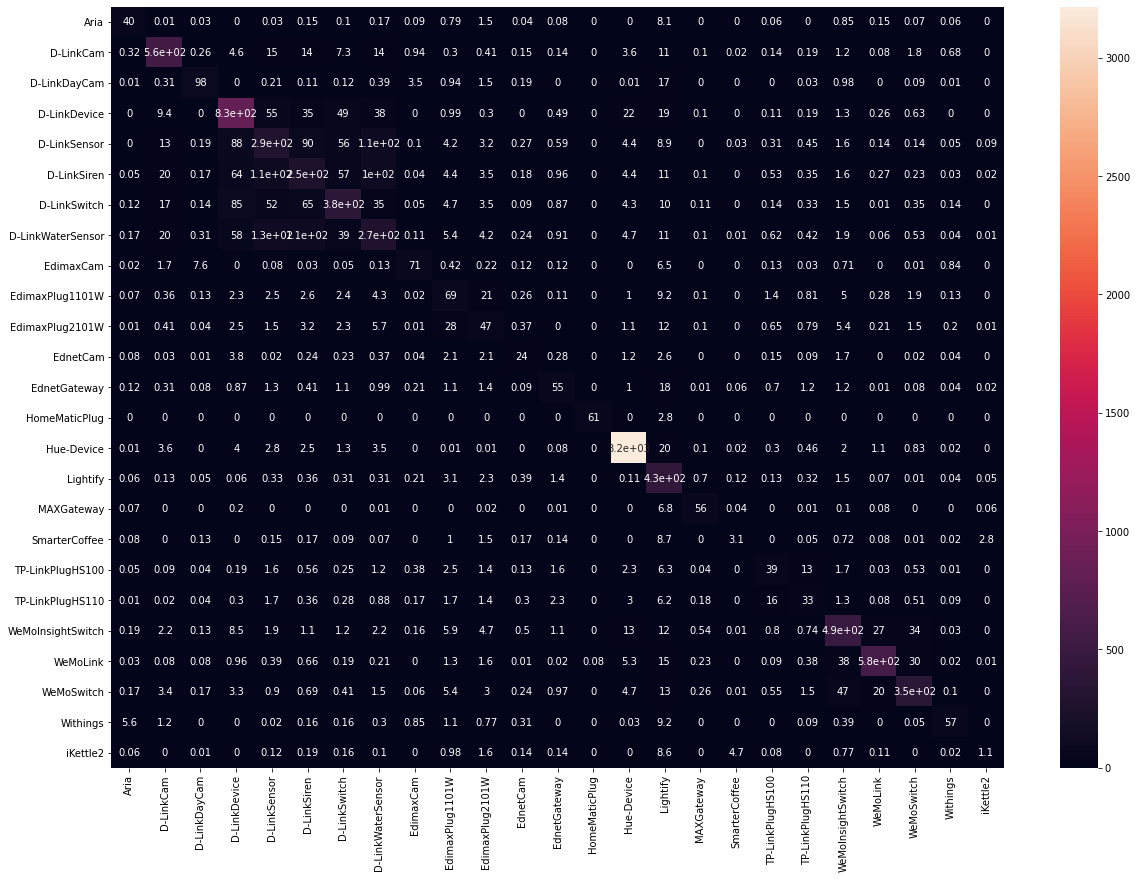





IoTDevID       0   1   Random  0.77  0.66  0.7   0.66  0.67  0.74  4.61     0.15    4.76    
IoTDevID       0   2   Random  0.78  0.66  0.69  0.66  0.67  0.74  3.84     0.17    4.0     
IoTDevID       0   3   Random  0.78  0.66  0.69  0.66  0.67  0.75  3.9      0.14    4.04    
IoTDevID       0   4   Random  0.78  0.67  0.71  0.67  0.68  0.74  3.87     0.16    4.03    
IoTDevID       0   5   Random  0.78  0.66  0.71  0.66  0.68  0.74  3.87     0.15    4.02    
IoTDevID       0   6   Random  0.78  0.66  0.7   0.66  0.67  0.74  3.89     0.15    4.04    
IoTDevID       0   7   Random  0.78  0.66  0.71  0.66  0.68  0.75  4.49     0.2     4.69    
IoTDevID       0   8   Random  0.77  0.65  0.69  0.65  0.66  0.74  5.03     0.21    5.23    
IoTDevID       0   9   Random  0.78  0.65  0.71  0.65  0.67  0.74  5.01     0.21    5.21    
IoTDevID       0   10  Random  0.78  0.66  0.7   0.66  0.67  0.75  4.99     0.21    5.19    
IoTDevID       1   1   Random  0.77  0.64  0.71  0.64  0.66  0.74 

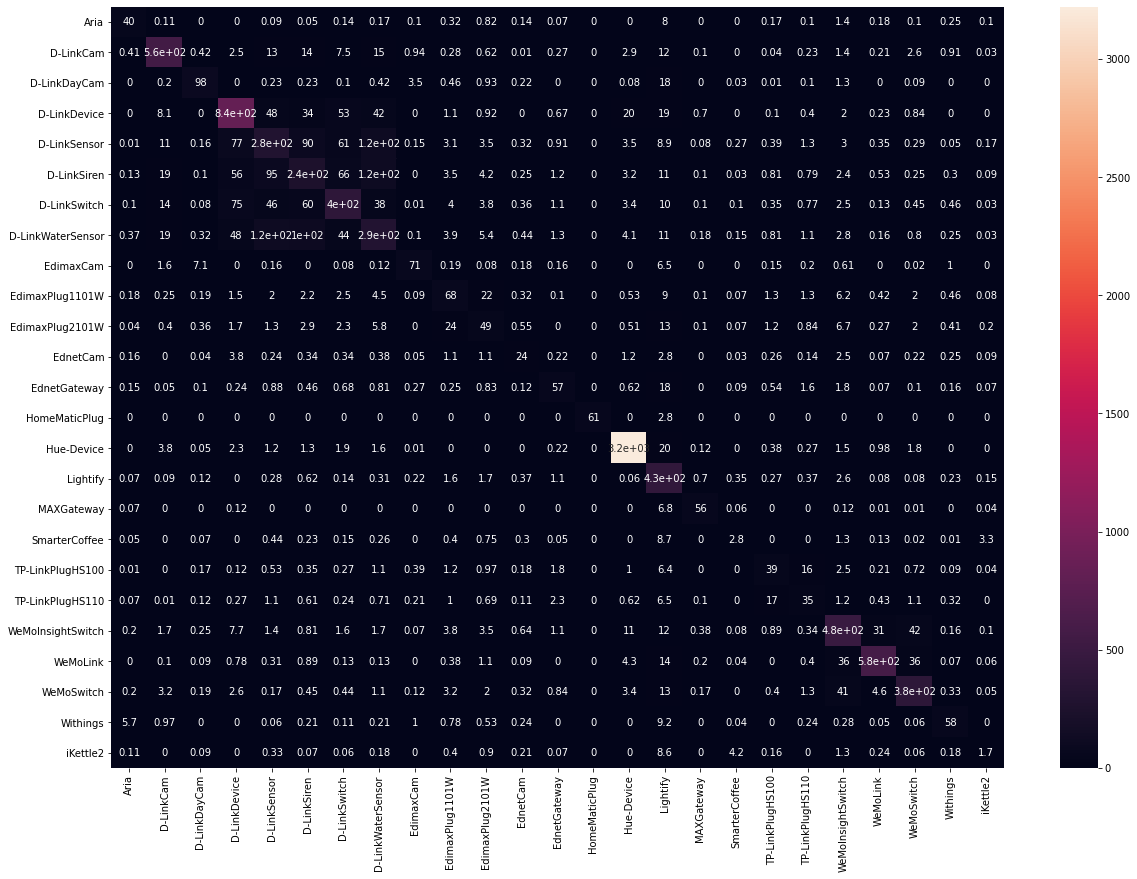





IoTDevID       0   1   KNN_R   0.77  0.65  0.68  0.65  0.65  0.73  2.51     0.93    3.45    
IoTDevID       0   2   KNN_R   0.76  0.64  0.64  0.64  0.63  0.72  2.58     0.96    3.54    
IoTDevID       0   3   KNN_R   0.76  0.65  0.68  0.65  0.65  0.72  2.51     0.93    3.45    
IoTDevID       0   4   KNN_R   0.77  0.67  0.68  0.67  0.66  0.74  2.57     0.97    3.53    
IoTDevID       0   5   KNN_R   0.76  0.65  0.66  0.65  0.64  0.72  2.62     1.01    3.63    
IoTDevID       0   6   KNN_R   0.77  0.64  0.68  0.64  0.65  0.73  2.64     1.1     3.73    
IoTDevID       0   7   KNN_R   0.76  0.63  0.65  0.63  0.63  0.72  2.65     1.01    3.66    
IoTDevID       0   8   KNN_R   0.76  0.65  0.68  0.65  0.66  0.73  2.94     1.05    3.99    
IoTDevID       0   9   KNN_R   0.77  0.64  0.67  0.64  0.64  0.73  2.64     0.99    3.64    
IoTDevID       0   10  KNN_R   0.77  0.66  0.68  0.66  0.66  0.74  2.28     0.59    2.87    
IoTDevID       1   1   KNN_R   0.76  0.65  0.65  0.65  0.65  0.73 

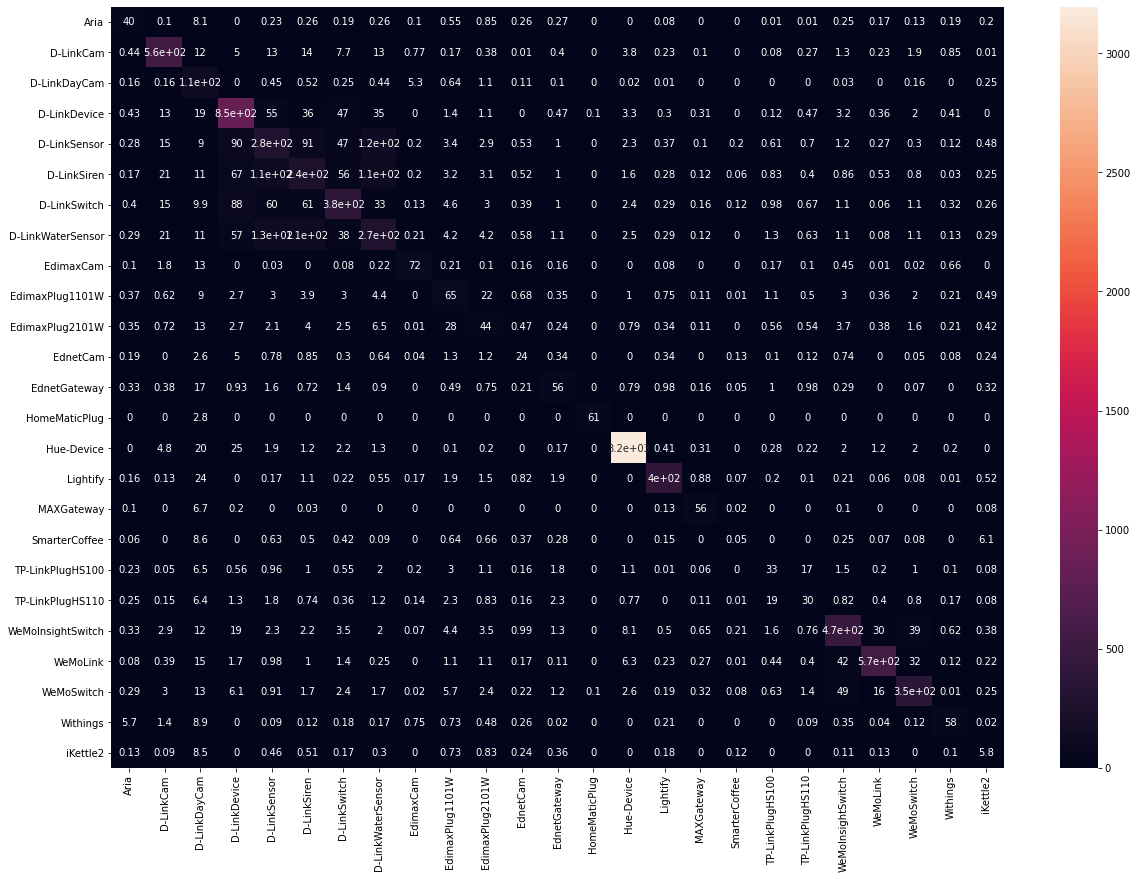





IoTDevID       0   1   GB      0.45  0.15  0.13  0.15  0.13  0.31  22.74    0.05    22.79   
IoTDevID       0   2   GB      0.46  0.15  0.13  0.15  0.12  0.33  22.63    0.05    22.68   
IoTDevID       0   3   GB      0.42  0.12  0.08  0.12  0.09  0.26  19.58    0.04    19.62   
IoTDevID       0   4   GB      0.45  0.15  0.11  0.15  0.12  0.33  18.67    0.05    18.72   
IoTDevID       0   5   GB      0.45  0.16  0.18  0.16  0.15  0.32  22.8     0.05    22.85   
IoTDevID       0   6   GB      0.47  0.15  0.14  0.15  0.13  0.35  22.74    0.05    22.79   
IoTDevID       0   7   GB      0.44  0.14  0.1   0.14  0.11  0.32  20.28    0.04    20.31   
IoTDevID       0   8   GB      0.46  0.16  0.12  0.16  0.13  0.34  17.94    0.03    17.98   
IoTDevID       0   9   GB      0.47  0.15  0.13  0.15  0.13  0.34  22.68    0.05    22.73   
IoTDevID       0   10  GB      0.46  0.15  0.14  0.15  0.13  0.32  22.73    0.05    22.78   
IoTDevID       1   1   GB      0.47  0.19  0.15  0.19  0.16  0.35 

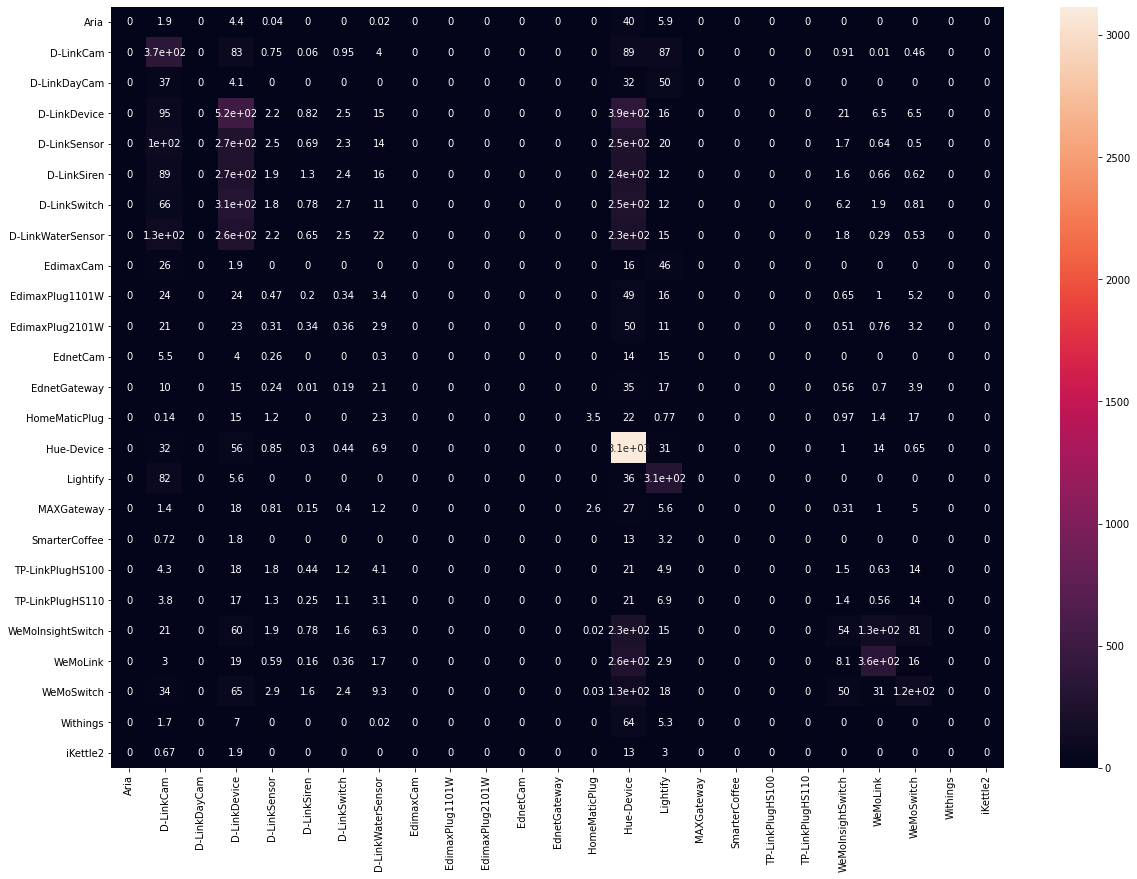

In [6]:
ths = open("08_2020_NB.csv", "w")
ths.write("Dataset,T,CV,ML algorithm,Acc,b_Acc,Precision, Recall , F1-score, kappa ,tra-Time,test-Time,total-Time))\n")
repetition=10


from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import Normalizer
print ('%-15s %-3s %-3s %-6s  %-5s %-5s %-5s %-5s %-5s %-5s %-8s %-8s%-8s'%
           ("Dataset","T","CV","ML alg","Acc","b_Acc","Prec", "Rec" , "F1", "kap" ,"tra-T","test-T","total"))
for loop in files_add:
    for ii in ml_list:
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        for i in range(repetition):
            rnd = random()
            kfold = KFold(10, True, int(rnd*100))  
            cv=0
            df = pd.read_csv(loop)#,header=None )
            # del df["Mac"] # if dataset has MAC colomn please uncomment this line
            X =df[df.columns[0:-1]]
            X=np.array(X)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y=df[df.columns[-1]].cat.codes  
            #scaler = Normalizer().fit(X)
            #X = scaler.transform(X)
            # summarize transformed data
            dname=loop[7:-4]
            X.shape
            for train_index, test_index in kfold.split(X):
                results_y=[]
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]  
                cv+=1
                results_y.append(y_test)


                precision=[]
                recall=[]
                f1=[]
                accuracy=[]
                train_time=[]
                test_time=[]
                total_time=[]
                kappa=[]
                accuracy_b=[]
                    #machine learning algorithm is applied in this section
                clf = ml_list[ii]#choose algorithm from ml_list dictionary
                second=time.time()
                clf.fit(X_train, y_train)
                train_time.append(float((time.time()-second)) )
                second=time.time()
                predict =clf.predict(X_test)
                test_time.append(float((time.time()-second)) )

                rc=sklearn.metrics.recall_score(y_test, predict,average= "macro")
                pr=sklearn.metrics.precision_score(y_test, predict,average= "macro")
                f_1=sklearn.metrics.f1_score(y_test, predict,average= "macro")        
                report = classification_report(y_test, predict, target_names=target_names,output_dict=True)
                cr = pd.DataFrame(report).transpose()
                if class_based_results.empty:
                    class_based_results =cr
                else:
                    class_based_results = class_based_results.add(cr, fill_value=0)
                precision.append(float(pr))
                recall.append(float(rc))
                f1.append(float(f_1))
                accuracy_b.append(balanced_accuracy_score( y_test,predict))
                accuracy.append(accuracy_score(y_test, predict))
                #clf.score(X_test, y_test))
                #print(balanced_accuracy_score( y_test,predict))
                #t_time.append(float((time.time()-second)) )
                kappa.append(round(float(sklearn.metrics.cohen_kappa_score(y_test, predict, 
                labels=None, weights=None, sample_weight=None)),15))
                print ('%-15s %-3s %-3s %-6s  %-5s %-5s %-5s %-5s %-5s %-5s %-8s %-8s%-8s' % (dname,i,cv,ii[0:6],str(round(np.mean(accuracy),2)),str(round(np.mean(accuracy_b),2)),
                    str(round(np.mean(precision),2)), str(round(np.mean(recall),2)),str(round(np.mean(f1),2)), 
                    str(round(np.mean(kappa),2)),str(round(np.mean(train_time),2)),str(round(np.mean(test_time),2)),str(round(np.mean(test_time)+np.mean(train_time),2))))
                lines=(str(dname)+","+str(i)+","+str(cv)+","+str(ii)+","+str(round(np.mean(accuracy),15))+","+str(round(np.mean(accuracy_b),15))+","+str(round(np.mean(precision),15))+","+ str(round(np.mean(recall),15))+","+str(round(np.mean(f1),15))+","+str(round(np.mean(kappa),15))+","+str(round(np.mean(train_time),15))+","+str(round(np.mean(test_time),15))+","+str(round(np.mean(test_time)+np.mean(train_time),15))+"\n")

                ths.write (lines)

                df_cm = pd.DataFrame(confusion_matrix(y_test, predict))
                results_y.append(predict)
                if cm.empty:
                    cm =df_cm
                else:
                    cm = cm.add(df_cm, fill_value=0)
 
        print(class_based_results/100) 
        cm=cm/100
        graph_name="confusion matrix" +str(ii)       
        plt.figure(figsize = (20,14))
        sns.heatmap(cm,xticklabels=target_names, yticklabels=target_names, annot=True)
        plt.savefig(graph_name,bbox_inches='tight')#, dpi=400)
        plt.show()
        #print(cm)
        print("\n\n\n") 
ths.close()  

### Hyperparameters of SVM

In [9]:
ml_list={"SVM":SVC(C=9.033197579781678, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=1.0312187582625605, kernel='rbf', max_iter=-1, probability=True,
    random_state=1, shrinking=True, tol=0.001, verbose=False)}

In [10]:
files_add

['./IoTSentinel.csv', './IoTSense.csv', './IoTDevID.csv']

### (For SVM) This part is the main part of the file. Cross-validates the respective datasets 10-time 10-fold and prints the results (general results, class-based results and confusion matrix). 

Dataset         T   CV  ML alg  Acc   b_Acc Prec  Rec   F1    kap   tra-T    test-T  total   
IoTSentinel          0   1   SVM     0.71  0.57  0.66  0.57  0.61  0.66  2723.57  32.12   2755.69 
IoTSentinel          0   2   SVM     0.71  0.59  0.68  0.59  0.62  0.66  2698.53  32.07   2730.61 
IoTSentinel          0   3   SVM     0.71  0.59  0.67  0.59  0.62  0.67  2687.39  32.0    2719.39 
IoTSentinel          0   4   SVM     0.7   0.57  0.64  0.57  0.6   0.65  2731.67  31.9    2763.57 
IoTSentinel          0   5   SVM     0.72  0.57  0.67  0.57  0.61  0.67  3020.76  32.21   3052.97 
IoTSentinel          0   6   SVM     0.71  0.59  0.67  0.59  0.62  0.66  2711.03  32.09   2743.11 
IoTSentinel          0   7   SVM     0.71  0.59  0.68  0.59  0.62  0.67  2731.95  32.04   2763.99 
IoTSentinel          0   8   SVM     0.71  0.59  0.68  0.59  0.62  0.67  2713.6   32.08   2745.67 
IoTSentinel          0   9   SVM     0.71  0.59  0.67  0.59  0.61  0.67  2729.45  32.01   2761.46 
IoTSentinel    

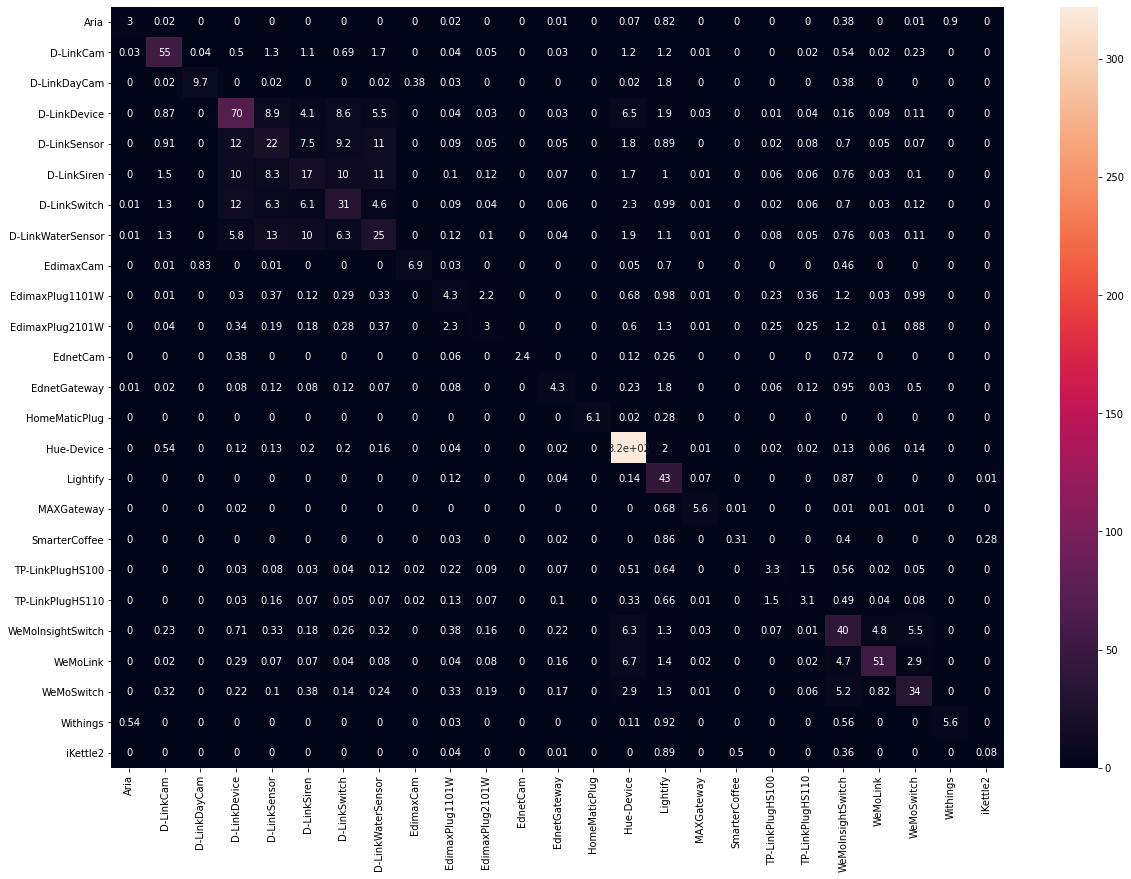





IoTSense            0   1   SVM     0.69  0.52  0.62  0.52  0.55  0.64  741.78   29.08   770.86  
IoTSense            0   2   SVM     0.69  0.52  0.61  0.52  0.54  0.64  694.2    28.92   723.11  
IoTSense            0   3   SVM     0.68  0.51  0.61  0.51  0.54  0.63  691.84   28.87   720.71  
IoTSense            0   4   SVM     0.68  0.5   0.63  0.5   0.53  0.63  696.5    28.79   725.29  
IoTSense            0   5   SVM     0.68  0.52  0.62  0.52  0.55  0.63  686.95   28.78   715.74  
IoTSense            0   6   SVM     0.67  0.51  0.61  0.51  0.54  0.62  690.68   28.7    719.38  
IoTSense            0   7   SVM     0.68  0.53  0.62  0.53  0.55  0.63  688.42   29.18   717.6   
IoTSense            0   8   SVM     0.68  0.5   0.61  0.5   0.52  0.63  691.39   28.73   720.12  
IoTSense            0   9   SVM     0.67  0.49  0.59  0.49  0.52  0.62  688.59   28.74   717.33  
IoTSense            0   10  SVM     0.68  0.52  0.62  0.52  0.54  0.63  695.21   28.85   724.05  
                

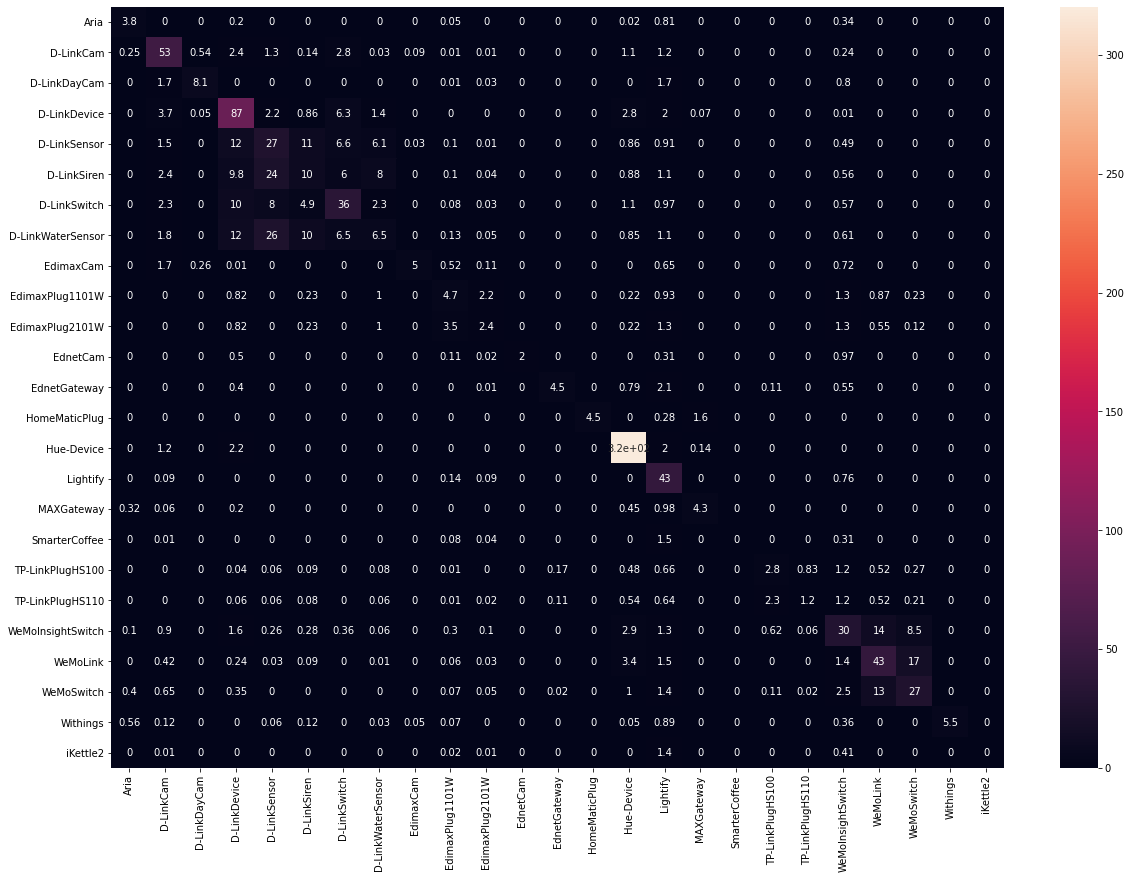





IoTDevID            0   1   SVM     0.75  0.61  0.7   0.61  0.65  0.71  3821.74  29.6    3851.34 
IoTDevID            0   2   SVM     0.75  0.61  0.7   0.61  0.64  0.71  3764.98  29.49   3794.47 
IoTDevID            0   3   SVM     0.75  0.61  0.7   0.61  0.64  0.7   3776.99  29.5    3806.49 
IoTDevID            0   4   SVM     0.74  0.62  0.71  0.62  0.65  0.7   3764.03  29.48   3793.51 
IoTDevID            0   5   SVM     0.75  0.62  0.68  0.62  0.64  0.71  3801.07  29.61   3830.68 
IoTDevID            0   6   SVM     0.75  0.62  0.7   0.62  0.65  0.71  3820.75  29.55   3850.3  
IoTDevID            0   7   SVM     0.75  0.62  0.7   0.62  0.65  0.71  3822.79  29.54   3852.33 
IoTDevID            0   8   SVM     0.75  0.62  0.7   0.62  0.65  0.71  3788.31  29.56   3817.87 
IoTDevID            0   9   SVM     0.75  0.61  0.7   0.61  0.65  0.71  3780.03  29.55   3809.58 
IoTDevID            0   10  SVM     0.75  0.62  0.71  0.62  0.66  0.71  3796.01  29.58   3825.59 
                

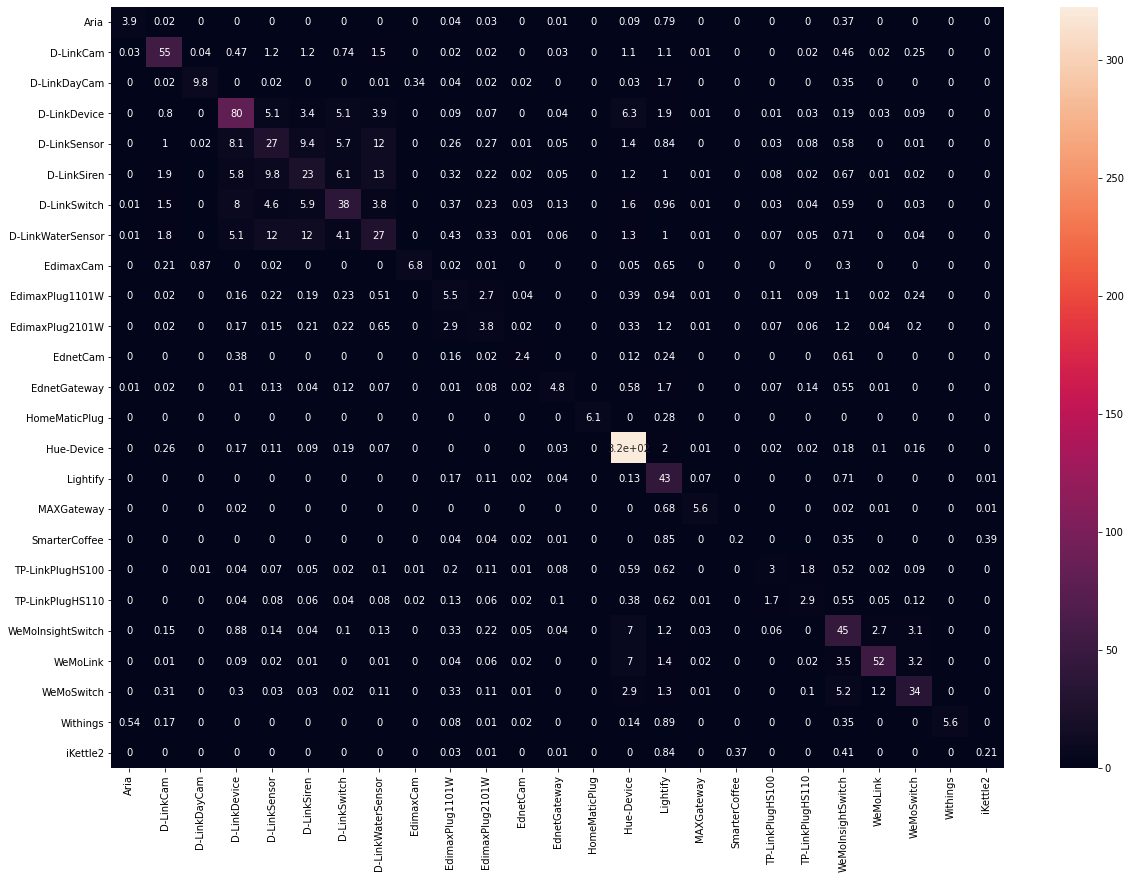

In [11]:
ths = open("1_ten_svm.csv", "w")
ths.write("Dataset,T,CV,ML algorithm,Acc,b_Acc,Precision, Recall , F1-score, kappa ,tra-Time,test-Time,total-Time))\n")
repetition=1

from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import Normalizer
print ('%-15s %-3s %-3s %-6s  %-5s %-5s %-5s %-5s %-5s %-5s %-8s %-8s%-8s'%
           ("Dataset","T","CV","ML alg","Acc","b_Acc","Prec", "Rec" , "F1", "kap" ,"tra-T","test-T","total"))
for loop in files_add:
    for ii in ml_list:
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        for i in range(repetition):
            rnd = random()
            kfold = KFold(10, True, int(rnd*100))  
            cv=0
            df = pd.read_csv(loop)#,header=None )
            # del df["Mac"] # if dataset has MAC colomn please uncomment this line
            X =df[df.columns[0:-1]]
            X=np.array(X)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y=df[df.columns[-1]].cat.codes  
            #scaler = Normalizer().fit(X)
            #X = scaler.transform(X)
            # summarize transformed data
            dname=loop[7:-4]
            X.shape
            for train_index, test_index in kfold.split(X):
                results_y=[]
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]  
                cv+=1
                results_y.append(y_test)


                precision=[]
                recall=[]
                f1=[]
                accuracy=[]
                train_time=[]
                test_time=[]
                total_time=[]
                kappa=[]
                accuracy_b=[]
                    #machine learning algorithm is applied in this section
                clf = ml_list[ii]#choose algorithm from ml_list dictionary
                second=time.time()
                clf.fit(X_train, y_train)
                train_time.append(float((time.time()-second)) )
                second=time.time()
                predict =clf.predict(X_test)
                test_time.append(float((time.time()-second)) )

                rc=sklearn.metrics.recall_score(y_test, predict,average= "macro")
                pr=sklearn.metrics.precision_score(y_test, predict,average= "macro")
                f_1=sklearn.metrics.f1_score(y_test, predict,average= "macro")        
                report = classification_report(y_test, predict, target_names=target_names,output_dict=True)
                cr = pd.DataFrame(report).transpose()
                if class_based_results.empty:
                    class_based_results =cr
                else:
                    class_based_results = class_based_results.add(cr, fill_value=0)
                precision.append(float(pr))
                recall.append(float(rc))
                f1.append(float(f_1))
                accuracy_b.append(balanced_accuracy_score( y_test,predict))
                accuracy.append(accuracy_score(y_test, predict))
                #clf.score(X_test, y_test))
                #print(balanced_accuracy_score( y_test,predict))
                #t_time.append(float((time.time()-second)) )
                kappa.append(round(float(sklearn.metrics.cohen_kappa_score(y_test, predict, 
                labels=None, weights=None, sample_weight=None)),15))
                print ('%-15s %-3s %-3s %-6s  %-5s %-5s %-5s %-5s %-5s %-5s %-8s %-8s%-8s' % (dname,i,cv,ii[0:6],str(round(np.mean(accuracy),2)),str(round(np.mean(accuracy_b),2)),
                    str(round(np.mean(precision),2)), str(round(np.mean(recall),2)),str(round(np.mean(f1),2)), 
                    str(round(np.mean(kappa),2)),str(round(np.mean(train_time),2)),str(round(np.mean(test_time),2)),str(round(np.mean(test_time)+np.mean(train_time),2))))
                lines=(str(dname)+","+str(i)+","+str(cv)+","+str(ii)+","+str(round(np.mean(accuracy),15))+","+str(round(np.mean(accuracy_b),15))+","+str(round(np.mean(precision),15))+","+ str(round(np.mean(recall),15))+","+str(round(np.mean(f1),15))+","+str(round(np.mean(kappa),15))+","+str(round(np.mean(train_time),15))+","+str(round(np.mean(test_time),15))+","+str(round(np.mean(test_time)+np.mean(train_time),15))+"\n")

                ths.write (lines)

                df_cm = pd.DataFrame(confusion_matrix(y_test, predict))
                results_y.append(predict)
                if cm.empty:
                    cm =df_cm
                else:
                    cm = cm.add(df_cm, fill_value=0)
 
        print(class_based_results/100) 
        cm=cm/100
        graph_name="confusion matrix" +str(ii)       
        plt.figure(figsize = (20,14))
        sns.heatmap(cm,xticklabels=target_names, yticklabels=target_names, annot=True)
        plt.savefig(graph_name,bbox_inches='tight')#, dpi=400)
        plt.show()
        #print(cm)
        print("\n\n\n") 
ths.close()  